# Exploratory Data Analysis

## 1. Import Libraries and Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_dir = '../data/basketballPlayoffs_cleaned/'
awards_players = pd.read_csv(os.path.join(data_dir, 'awards_players_cleaned.csv'))
coaches = pd.read_csv(os.path.join(data_dir, 'coaches_cleaned.csv'))
players = pd.read_csv(os.path.join(data_dir, 'players_cleaned.csv'))
players_teams = pd.read_csv(os.path.join(data_dir, 'players_teams_cleaned.csv'))
series_post = pd.read_csv(os.path.join(data_dir, 'series_post_cleaned.csv'))
teams = pd.read_csv(os.path.join(data_dir, 'teams_cleaned.csv'))
teams_post = pd.read_csv(os.path.join(data_dir, 'teams_post_cleaned.csv'))

## 2. Team Performance Trends
### 2.1 Win-Loss Record Over Seasons

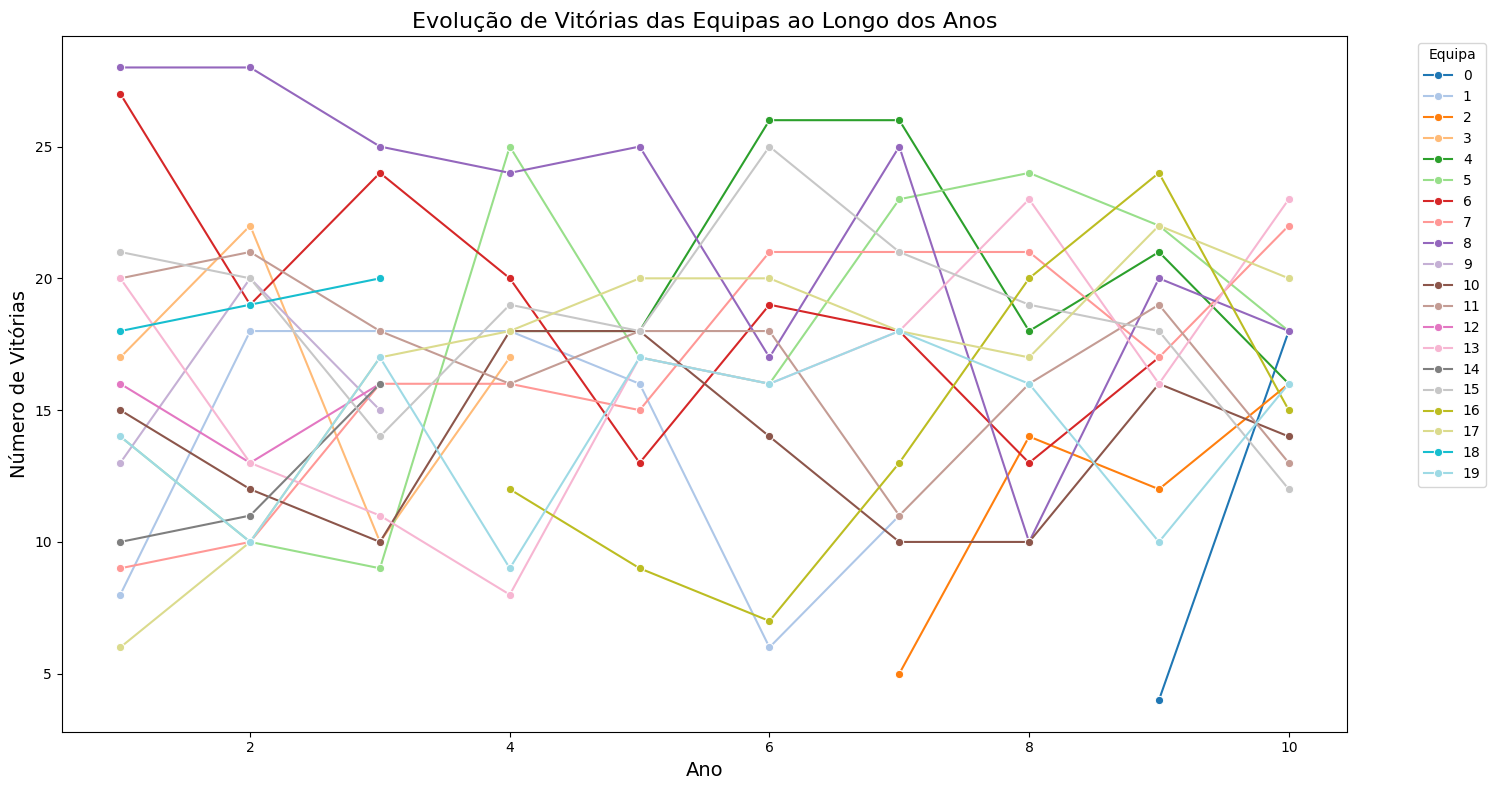

In [2]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=teams, x='year', y='won', hue='tmID', palette='tab20', marker='o')

plt.title('Evolução de Vitórias das Equipas ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Vitórias', fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Equipa')

plt.tight_layout()

plt.show()

    tmID  won
8      8  220
15    15  187
5      5  178
11    11  170
6      6  170
17    17  168
7      7  168
13    13  165
19    19  143
4      4  143
10    10  137
16    16  100
1      1   95
3      3   66
18    18   57
9      9   48
2      2   47
12    12   45
14    14   37
0      0   22


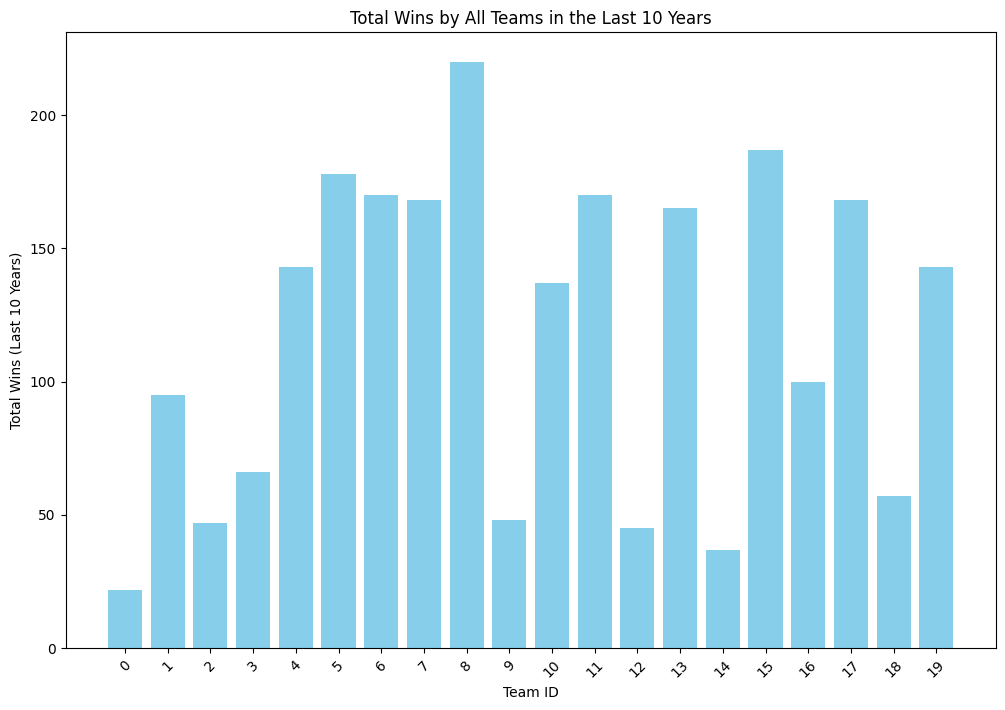

    tmID  o_pts
13    13  25307
8      8  24869
5      5  24262
15    15  23962
10    10  23686
17    17  23669
19    19  23442
7      7  23162
11    11  23080
6      6  20902
4      4  17892
16    16  16748
1      1  15342
2      2   9892
3      3   8489
18    18   7038
12    12   6602
14    14   6438
9      9   5834
0      0   5395


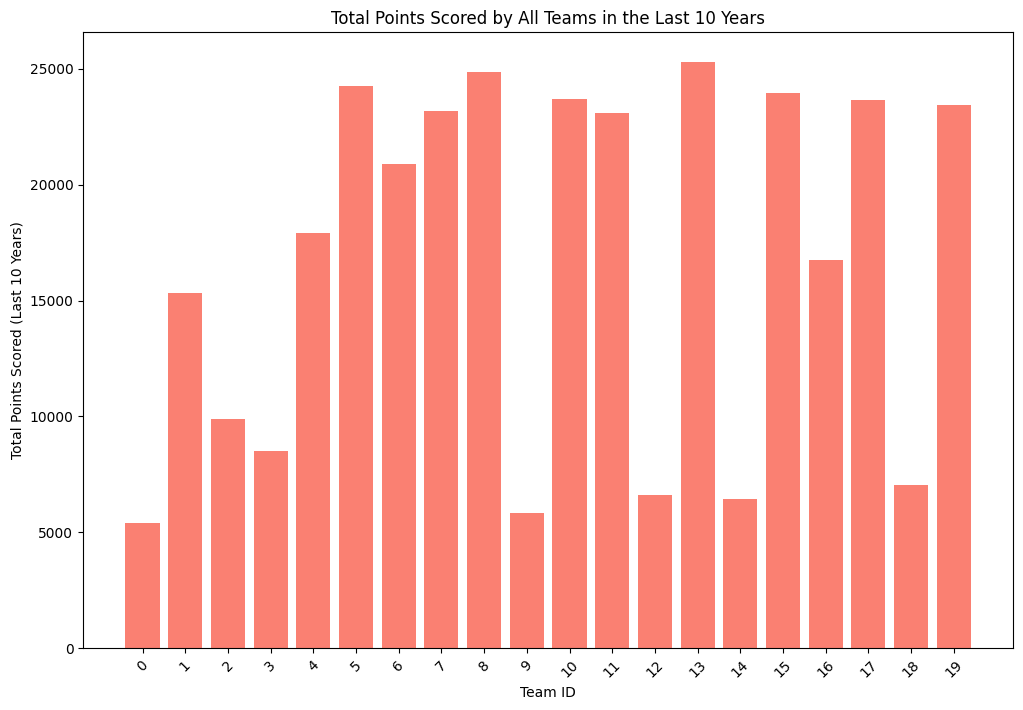

    tmID   o_pts
13    13  3156.0
0      0  2861.0
10    10  2731.0
5      5  2652.0
4      4  2651.0
16    16  2615.0
15    15  2610.0
7      7  2606.0
19    19  2585.0
2      2  2573.0
17    17  2544.0
8      8  2533.0
11    11  2512.0
12    12     0.0
14    14     0.0
1      1     0.0
9      9     0.0
6      6     0.0
18    18     0.0
3      3     0.0


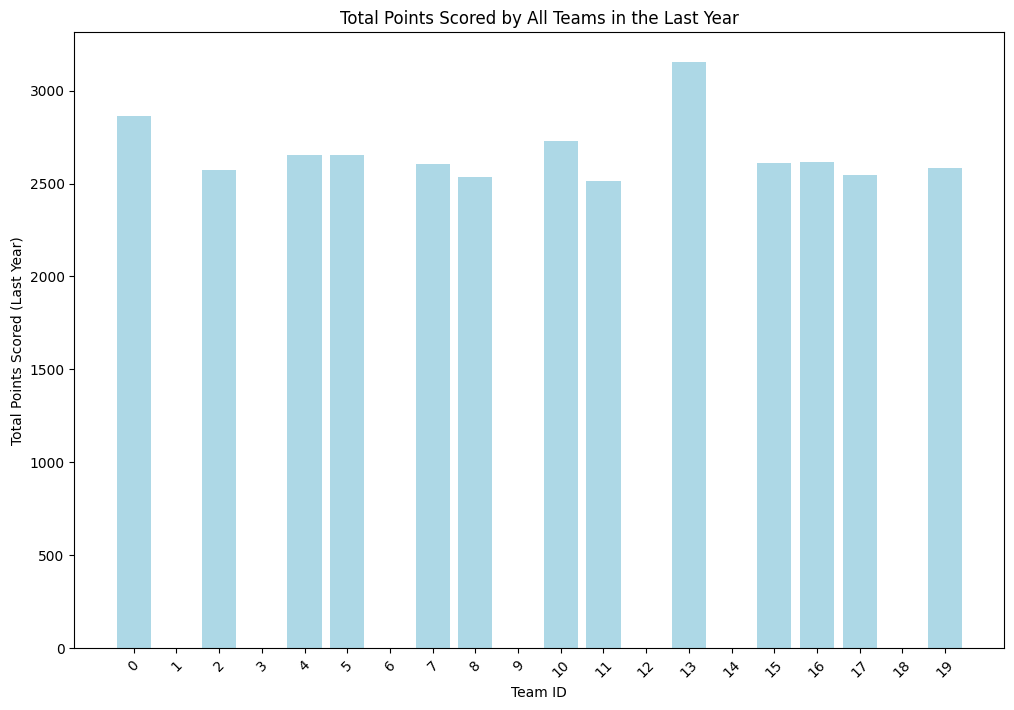

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data_dir = '../data/basketballPlayoffs_cleaned/'
teams = pd.read_csv(os.path.join(data_dir, 'teams_cleaned.csv'))

last_10_years = 10
current_year = teams['year'].max()  
start_year = current_year - last_10_years

teams_last_10_years = teams[(teams['year'] >= start_year) & (teams['year'] <= current_year)]

team_wins = teams_last_10_years.groupby('tmID')['won'].sum().reset_index()

all_teams = pd.DataFrame({'tmID': teams['tmID'].unique()})
team_wins = pd.merge(all_teams, team_wins, on='tmID', how='left').fillna(0)

team_wins_sorted = team_wins.sort_values(by='won', ascending=False)

print(team_wins_sorted)

plt.figure(figsize=(12, 8))
plt.bar(team_wins_sorted['tmID'], team_wins_sorted['won'], color='skyblue')
plt.xlabel('Team ID')
plt.ylabel('Total Wins (Last 10 Years)')
plt.title('Total Wins by All Teams in the Last 10 Years') 
plt.xticks(team_wins_sorted['tmID'], rotation=45)  
plt.show()

team_points = teams_last_10_years.groupby('tmID')['o_pts'].sum().reset_index()

team_points = pd.merge(all_teams, team_points, on='tmID', how='left').fillna(0)

team_points_sorted = team_points.sort_values(by='o_pts', ascending=False)

print(team_points_sorted)

plt.figure(figsize=(12, 8))
plt.bar(team_points_sorted['tmID'], team_points_sorted['o_pts'], color='salmon')
plt.xlabel('Team ID')
plt.ylabel('Total Points Scored (Last 10 Years)')
plt.title('Total Points Scored by All Teams in the Last 10 Years')  
plt.xticks(team_points_sorted['tmID'], rotation=45)  
plt.show()

teams_last_year = teams[teams['year'] == current_year]
team_points_last_year = teams_last_year.groupby('tmID')['o_pts'].sum().reset_index()

team_points_last_year = pd.merge(all_teams, team_points_last_year, on='tmID', how='left').fillna(0)

team_points_last_year_sorted = team_points_last_year.sort_values(by='o_pts', ascending=False)

print(team_points_last_year_sorted)

plt.figure(figsize=(12, 8))
plt.bar(team_points_last_year_sorted['tmID'], team_points_last_year_sorted['o_pts'], color='lightblue')
plt.xlabel('Team ID')
plt.ylabel('Total Points Scored (Last Year)')
plt.title('Total Points Scored by All Teams in the Last Year')  
plt.xticks(team_points_last_year_sorted['tmID'], rotation=45)  
plt.show()


### 2.2 Offensive vs Defensive Performance

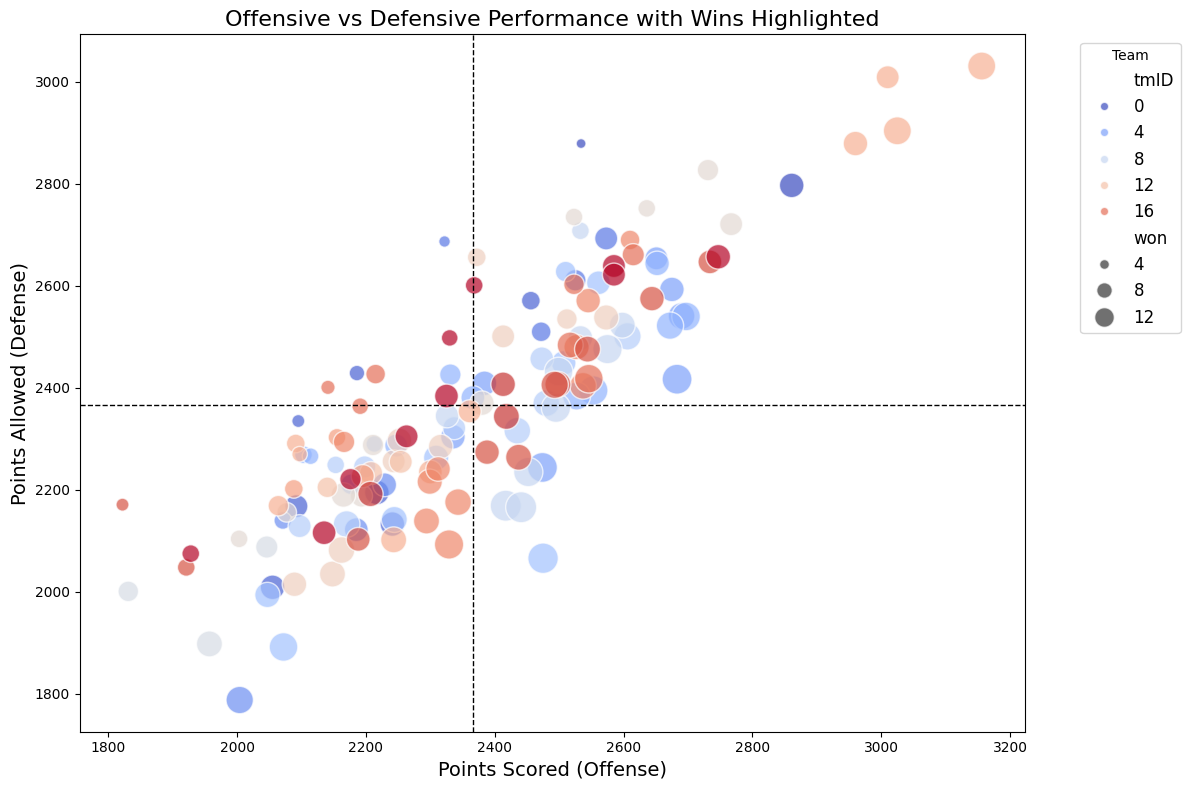

In [328]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(data=teams, x='o_pts', y='d_pts', hue='tmID', size='won',
                          sizes=(50, 500), palette='coolwarm', alpha=0.7)

plt.axhline(y=teams['d_pts'].mean(), color='black', linestyle='--', linewidth=1)
plt.axvline(x=teams['o_pts'].mean(), color='black', linestyle='--', linewidth=1)

plt.title('Offensive vs Defensive Performance with Wins Highlighted', fontsize=16)
plt.xlabel('Points Scored (Offense)', fontsize=14)
plt.ylabel('Points Allowed (Defense)', fontsize=14)

handles, labels = scatter.get_legend_handles_labels()
size_legend = plt.legend(handles[-4:], labels[-4:], title='Wins (Size)', 
                         bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=12)

scatter.legend(handles[:-4], labels[:-4], title='Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()

plt.show()

### 2.3 Team Performance Metrics Distribution


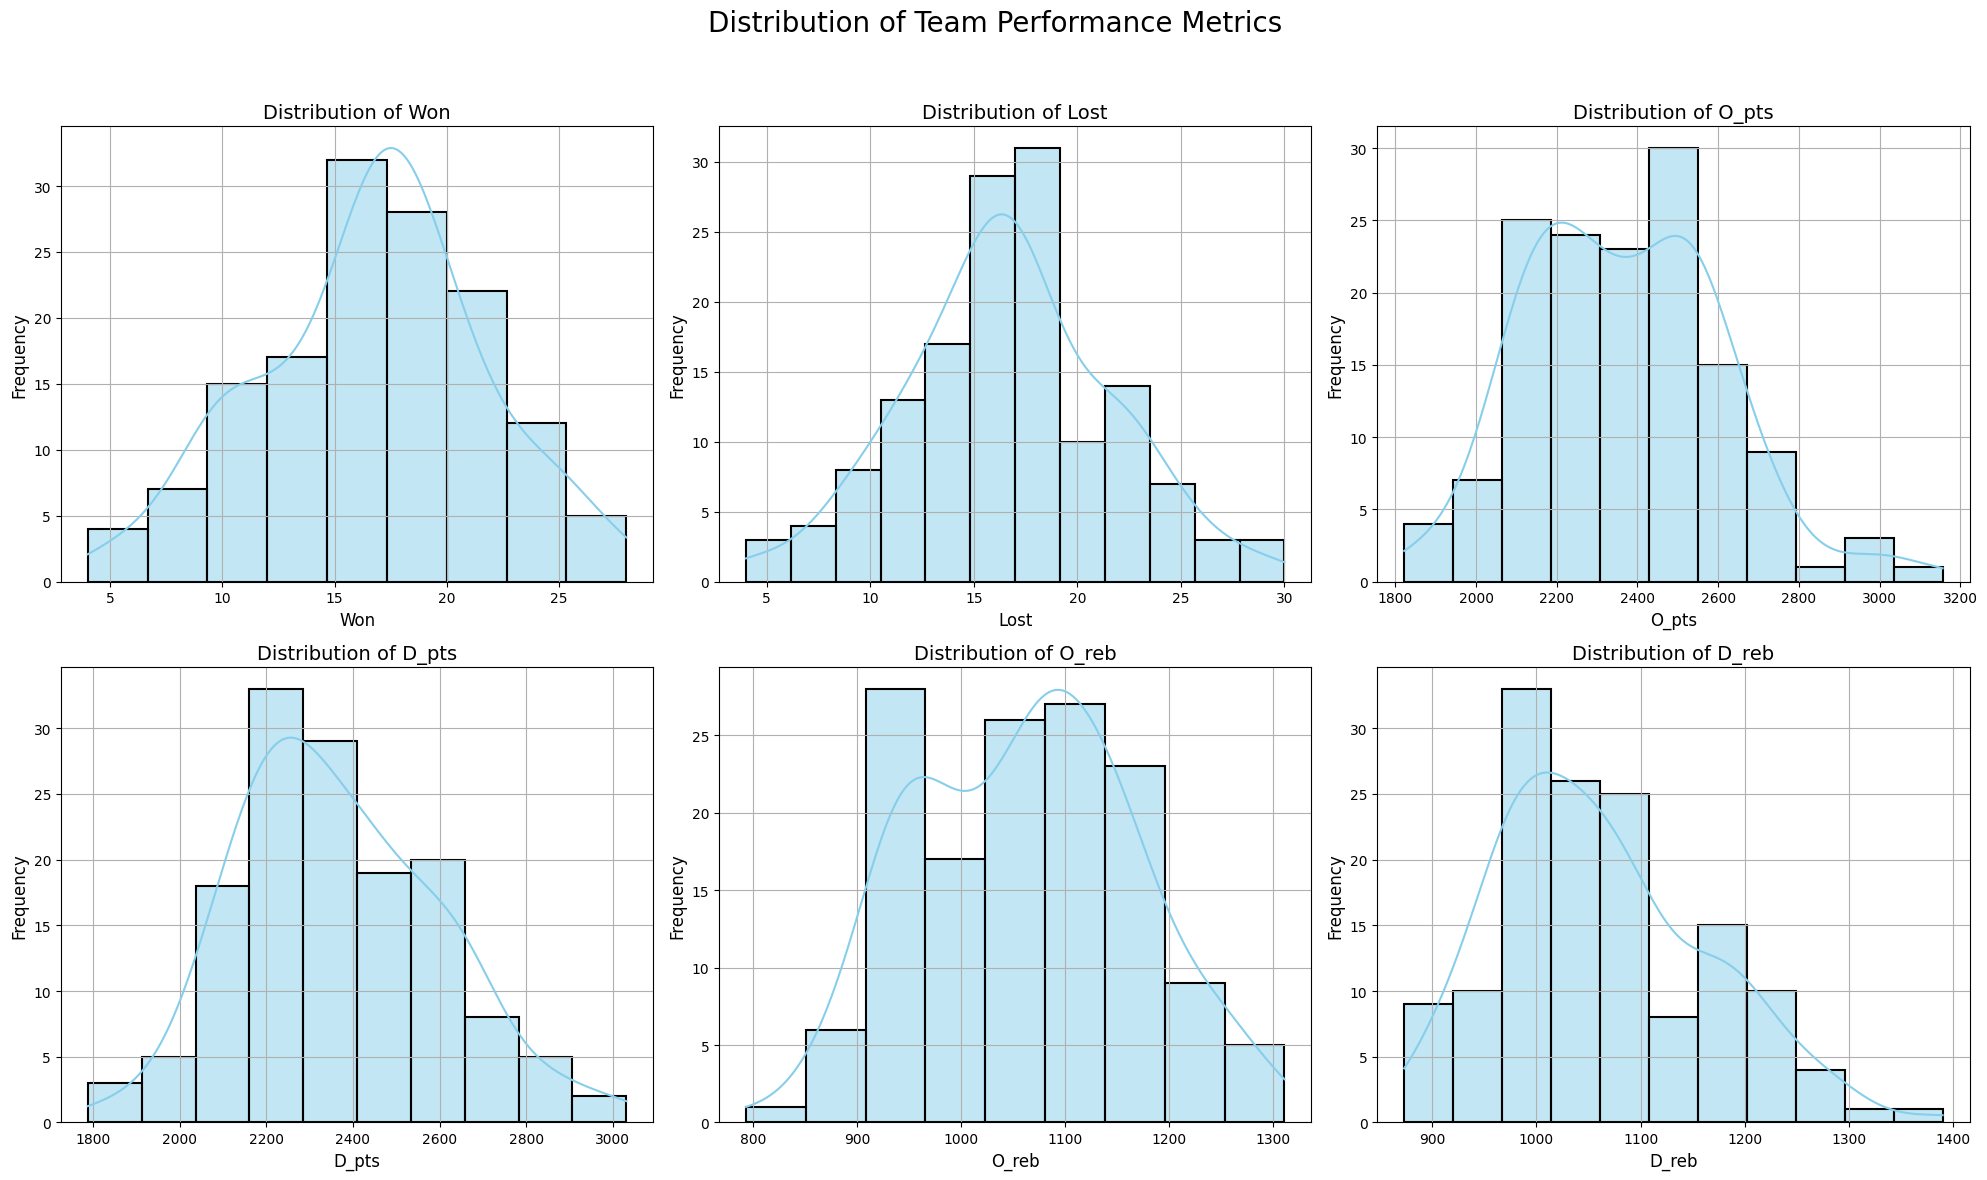

In [329]:
performance_metrics = ['won', 'lost', 'o_pts', 'd_pts', 'o_reb', 'd_reb']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Team Performance Metrics', fontsize=20)

for i, metric in enumerate(performance_metrics):
    sns.histplot(data=teams, x=metric, kde=True, color='skyblue', ax=axes[i//3, i%3], edgecolor='black', linewidth=1.5)
    
    axes[i//3, i%3].set_title(f'Distribution of {metric.capitalize()}', fontsize=14)  
    axes[i//3, i%3].set_xlabel(metric.capitalize(), fontsize=12)  
    axes[i//3, i%3].set_ylabel('Frequency', fontsize=12)
    axes[i//3, i%3].grid(True)  

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

## 3. Player Statistics Analysis

### 3.1 Top Players by Points Scored

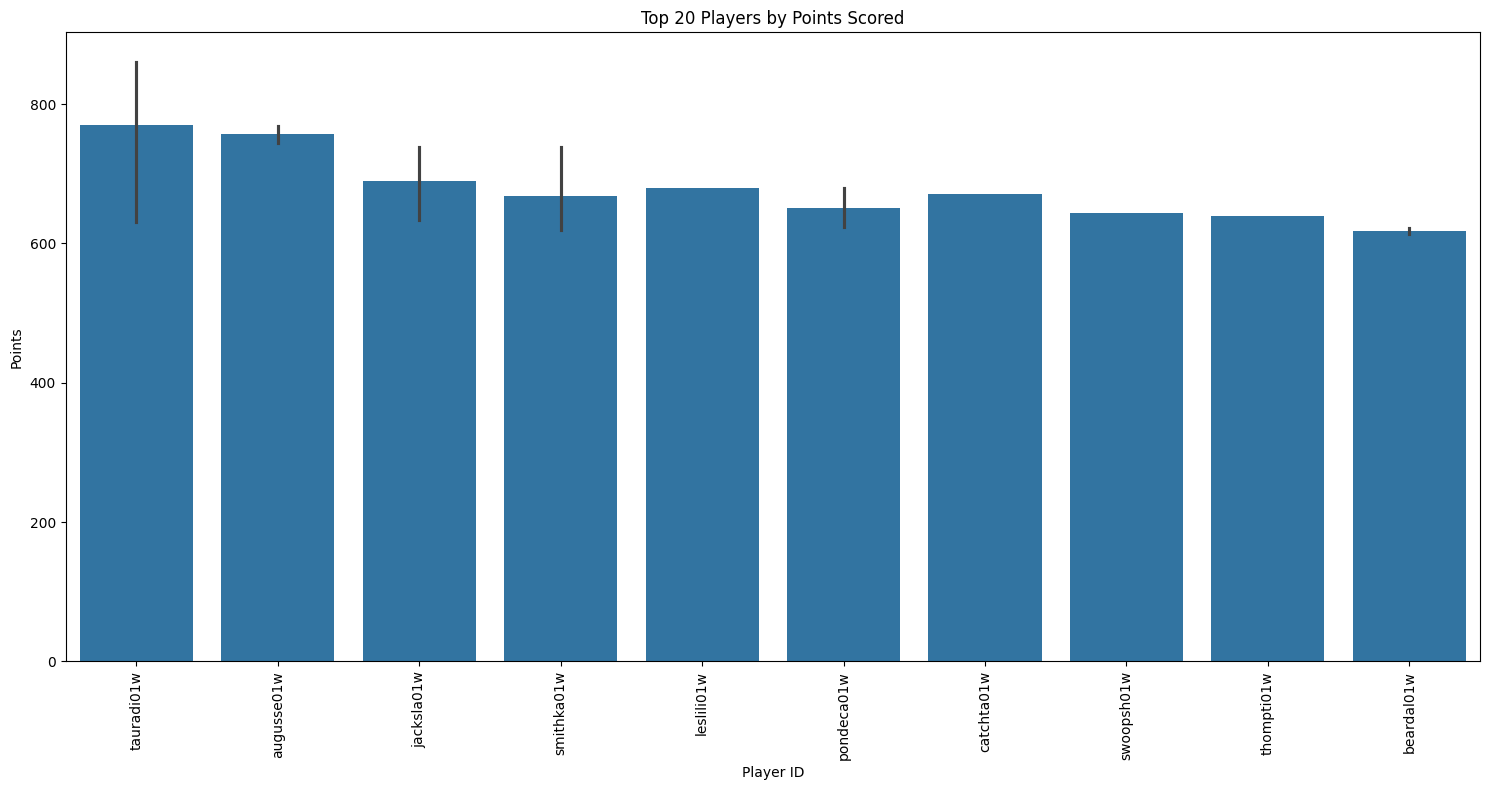

In [330]:
top_scorers = players_teams.nlargest(20, 'points')
plt.figure(figsize=(15, 8))
sns.barplot(data=top_scorers, x='playerID', y='points')
plt.title('Top 20 Players by Points Scored')
plt.xlabel('Player ID')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3.2 Player Performance Correlation Heatmap


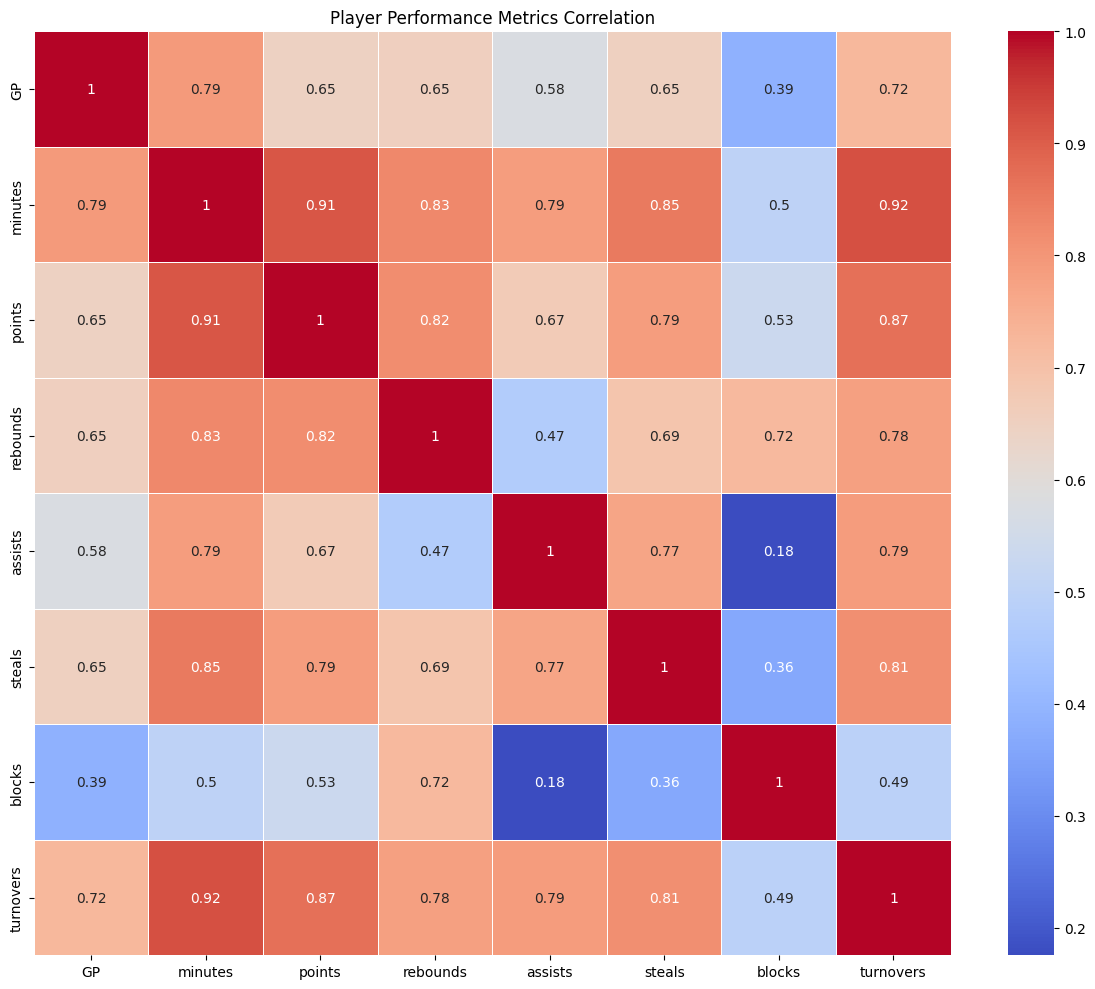

In [331]:
player_stats = ['GP', 'minutes', 'points', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers']
correlation = players_teams[player_stats].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Player Performance Metrics Correlation')
plt.tight_layout()
plt.show()

### 3.3 Player Minutes Distribution

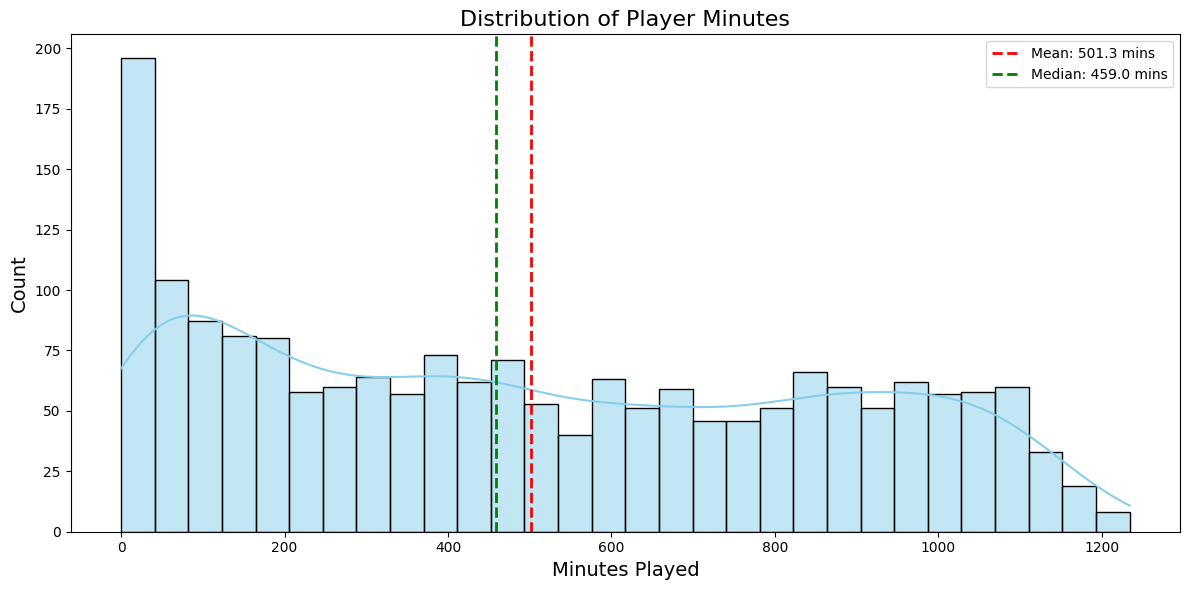

In [332]:
plt.figure(figsize=(12, 6))

sns.histplot(data=players_teams, x='minutes', kde=True, color='skyblue', bins=30, edgecolor='black')

mean_minutes = players_teams['minutes'].mean()
plt.axvline(mean_minutes, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_minutes:.1f} mins')

median_minutes = players_teams['minutes'].median()
plt.axvline(median_minutes, color='green', linestyle='--', linewidth=2, label=f'Median: {median_minutes:.1f} mins')

plt.title('Distribution of Player Minutes', fontsize=16)
plt.xlabel('Minutes Played', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend()

plt.tight_layout()

plt.show()

## 4. Coach Impact Analysis

### 4.1 Top Coaches by Win Percentage


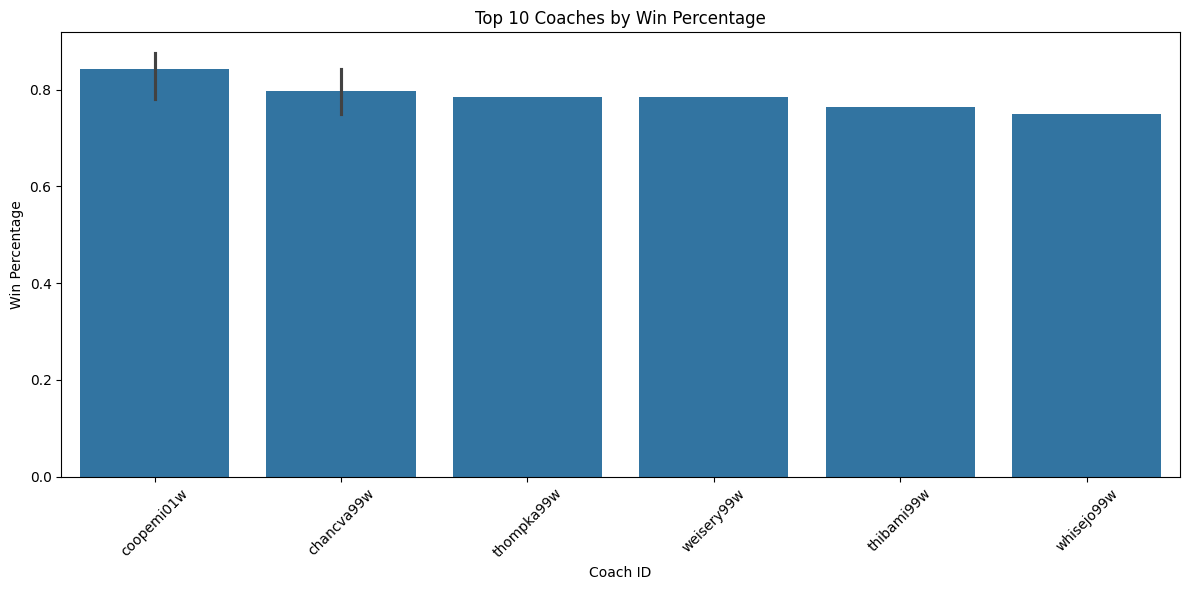

In [333]:
coaches['win_pct'] = coaches['won'] / (coaches['won'] + coaches['lost'])
top_coaches = coaches.nlargest(10, 'win_pct')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_coaches, x='coachID', y='win_pct')
plt.title('Top 10 Coaches by Win Percentage')
plt.xlabel('Coach ID')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.2 Coach Performance: Regular Season vs Postseason


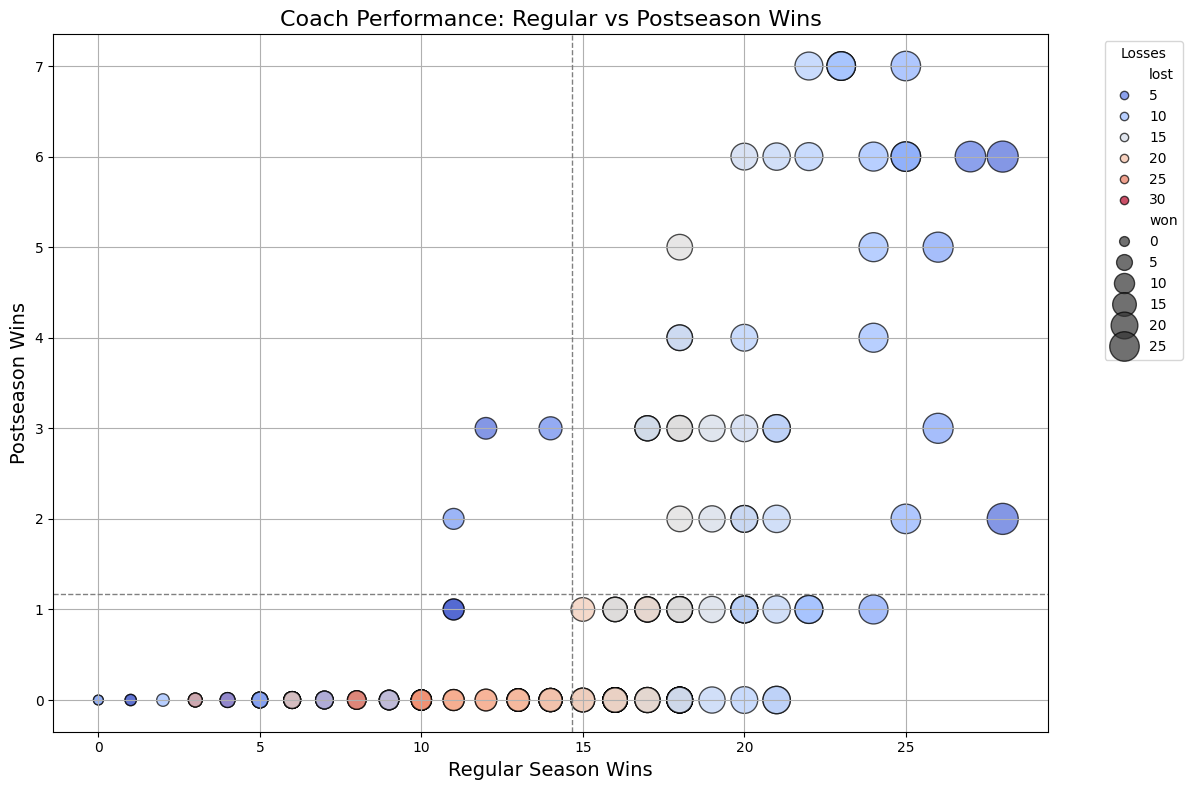

In [334]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(data=coaches, x='won', y='post_wins', size='won', hue='lost',
                          palette='coolwarm', sizes=(50, 500), alpha=0.7, edgecolor='black')

plt.axhline(y=coaches['post_wins'].mean(), color='gray', linestyle='--', linewidth=1)
plt.axvline(x=coaches['won'].mean(), color='gray', linestyle='--', linewidth=1)

plt.title('Coach Performance: Regular vs Postseason Wins', fontsize=16)
plt.xlabel('Regular Season Wins', fontsize=14)
plt.ylabel('Postseason Wins', fontsize=14)

scatter.legend(title='Losses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)

plt.tight_layout()

plt.show()

## 5. Playoff Qualification Patterns

### 5.1 Playoff Teams Win Distribution


/var/folders/dh/xf58vx896y30f2m4vjtr49qw0000gn/T/ipykernel_9978/3149525087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=teams, x='playoff', y='won', palette=['red', 'blue'], split=True)


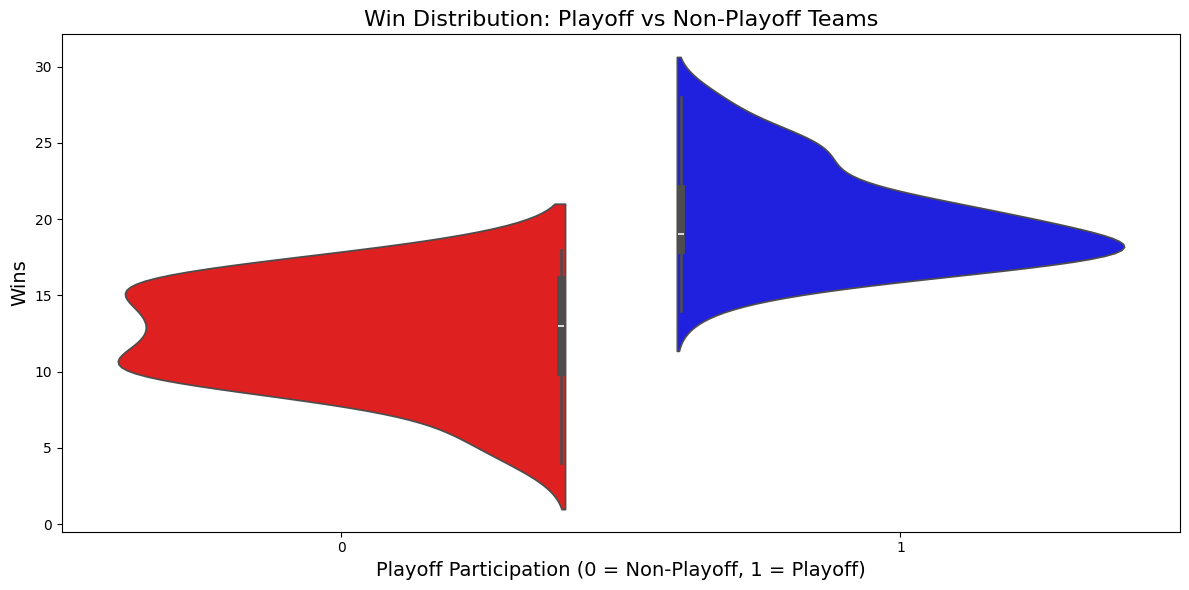

In [335]:
plt.figure(figsize=(12, 6))

sns.violinplot(data=teams, x='playoff', y='won', palette=['red', 'blue'], split=True)

plt.title('Win Distribution: Playoff vs Non-Playoff Teams', fontsize=16)
plt.xlabel('Playoff Participation (0 = Non-Playoff, 1 = Playoff)', fontsize=14)
plt.ylabel('Wins', fontsize=14)

plt.tight_layout()

plt.show()

### 5.2 Playoff Qualification Factors


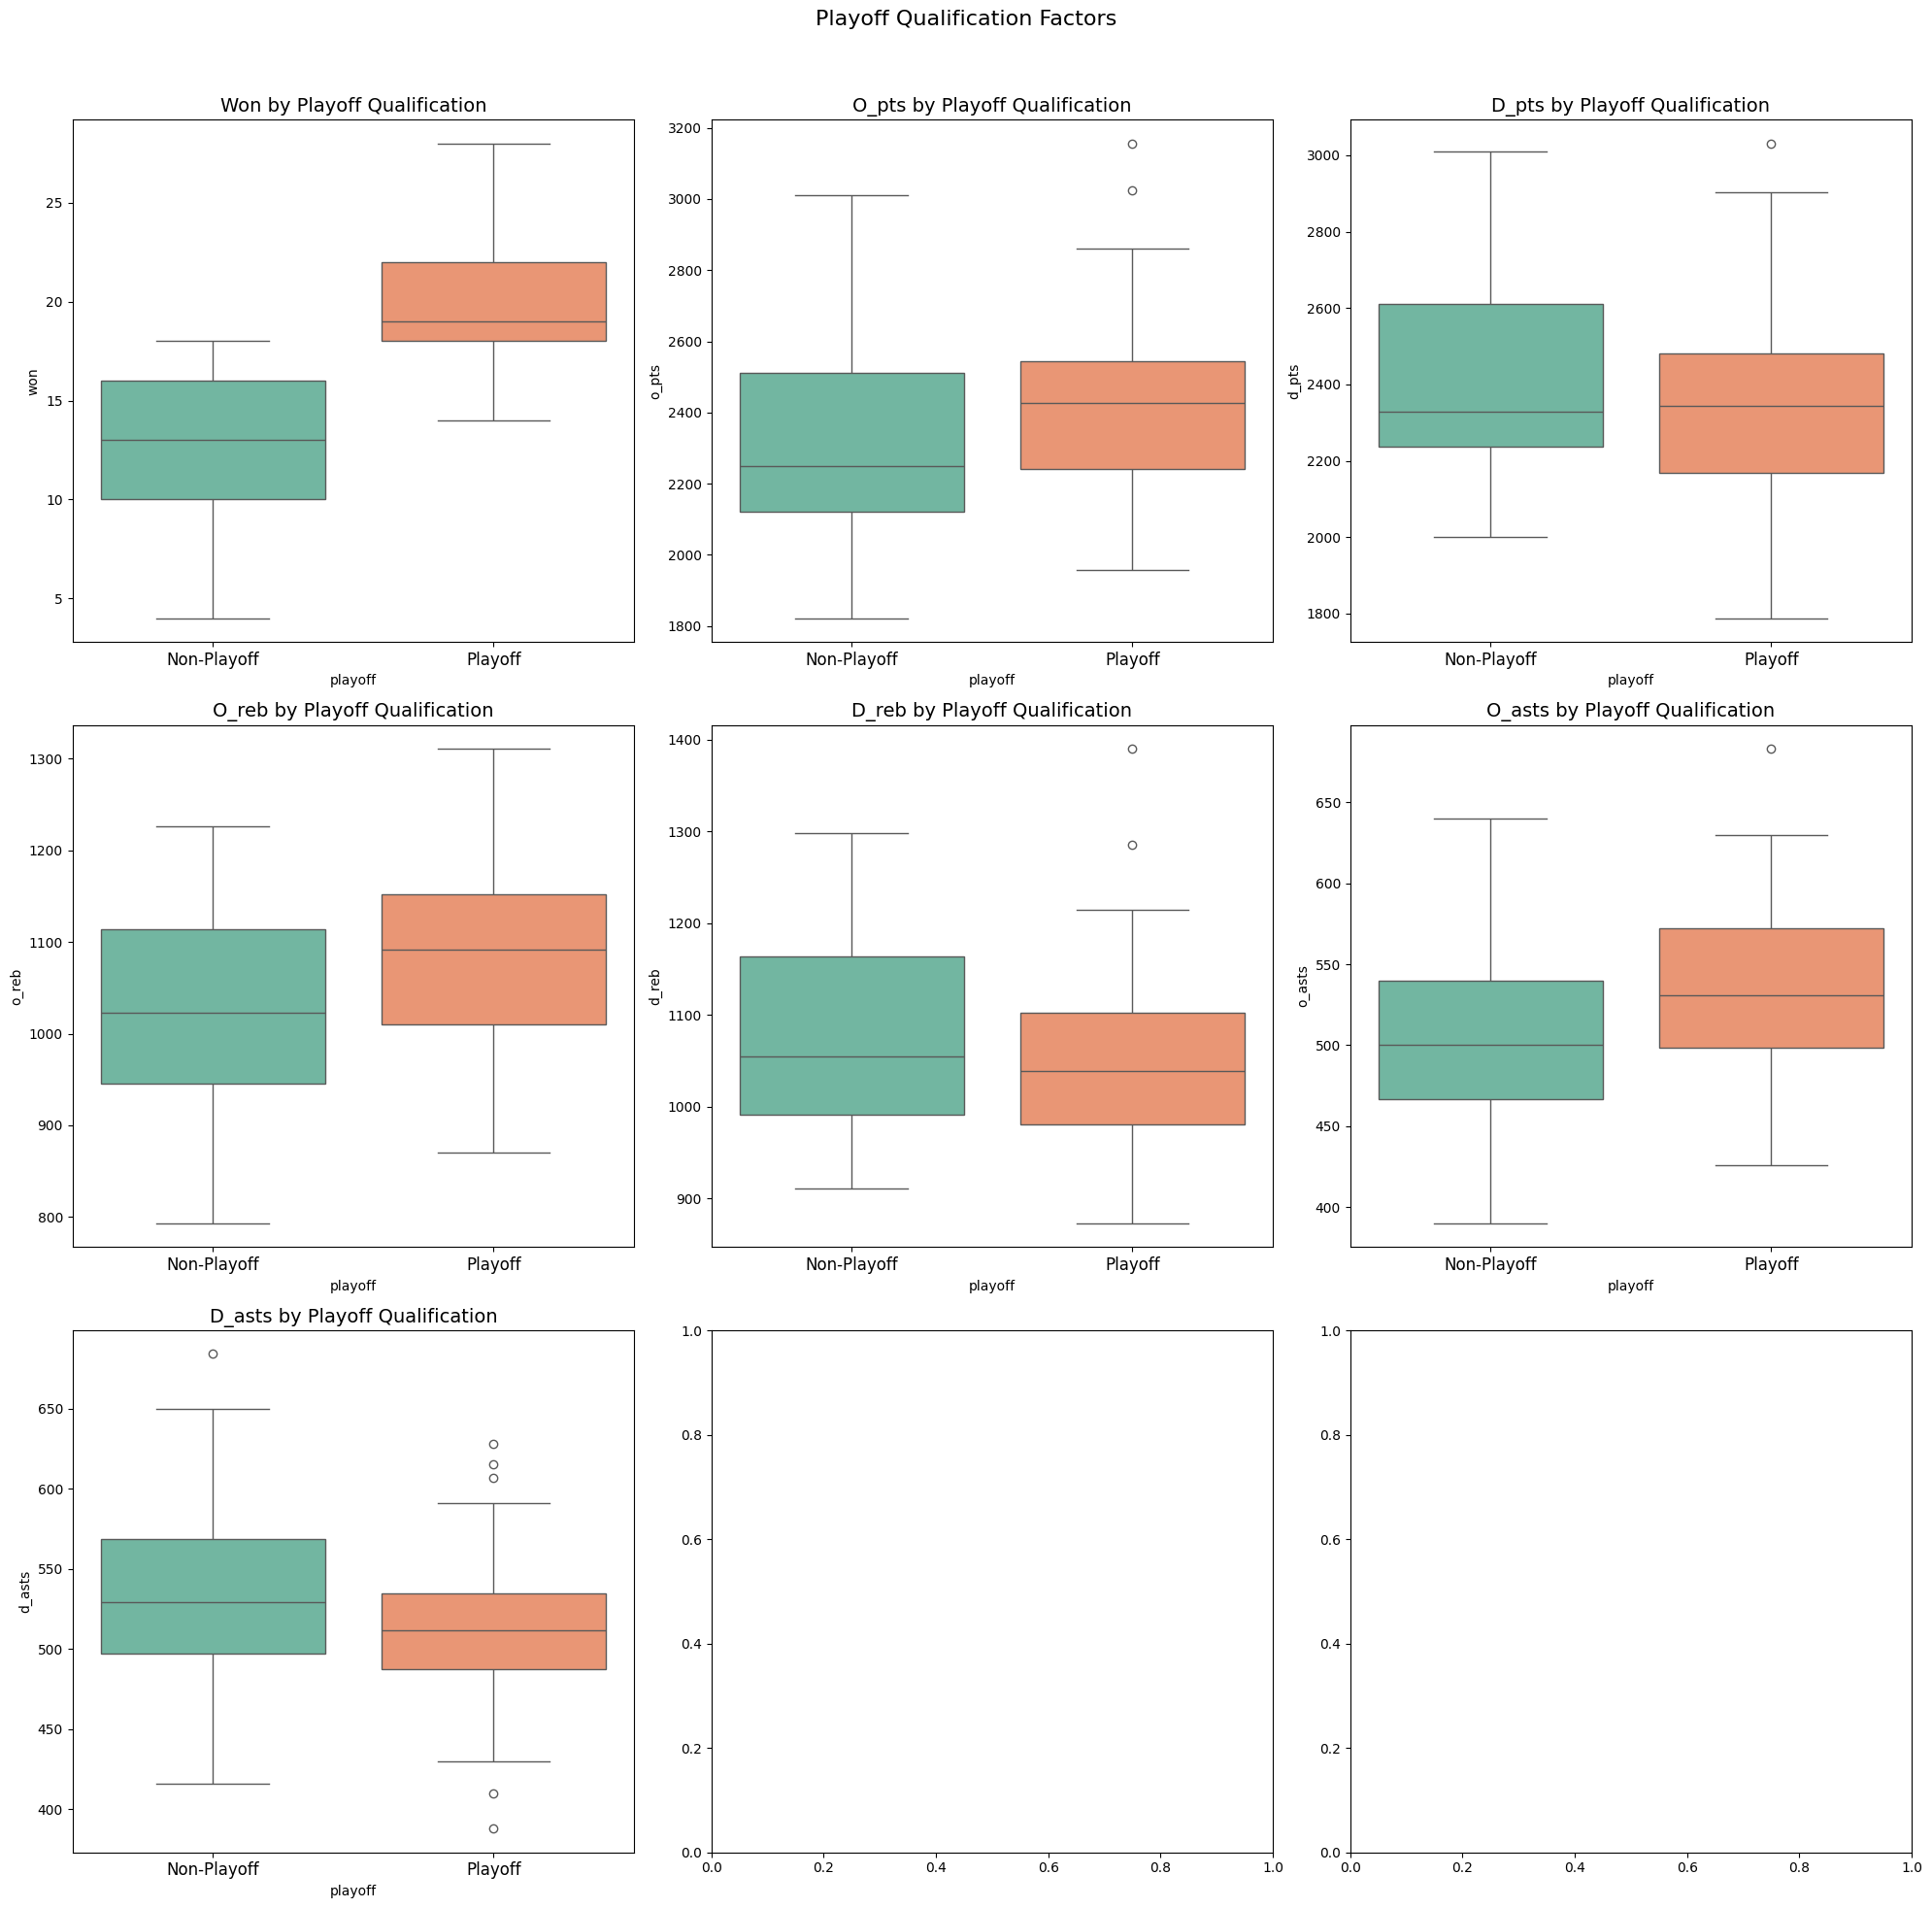

In [336]:
playoff_factors = ['won', 'o_pts', 'd_pts', 'o_reb', 'd_reb', 'o_asts', 'd_asts']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Playoff Qualification Factors', fontsize=16)

for i, factor in enumerate(playoff_factors):
    sns.boxplot(data=teams, x='playoff', y=factor, hue='playoff', ax=axes[i//3, i%3], palette='Set2', legend=False)
    
    axes[i//3, i%3].set_xticks([0, 1])
    axes[i//3, i%3].set_xticklabels(['Non-Playoff', 'Playoff'], fontsize=12)
    
    axes[i//3, i%3].set_title(f'{factor.capitalize()} by Playoff Qualification', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## 6. Award Analysis

### 6.1 Awards Distribution by Player

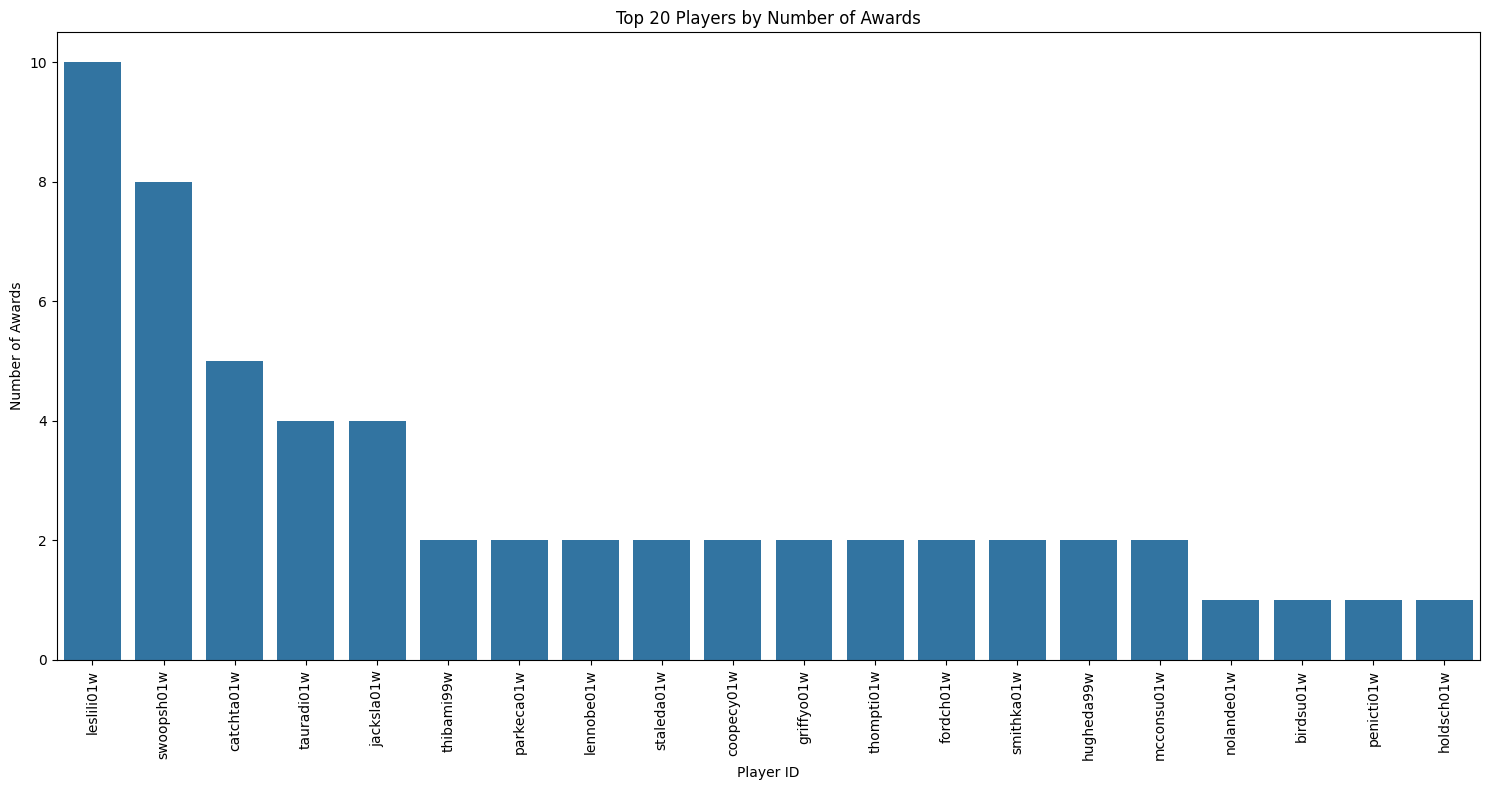

In [337]:
award_counts = awards_players['playerID'].value_counts().nlargest(20)

plt.figure(figsize=(15, 8))
sns.barplot(x=award_counts.index, y=award_counts.values)
plt.title('Top 20 Players by Number of Awards')
plt.xlabel('Player ID')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 6.2 Award Types Distribution


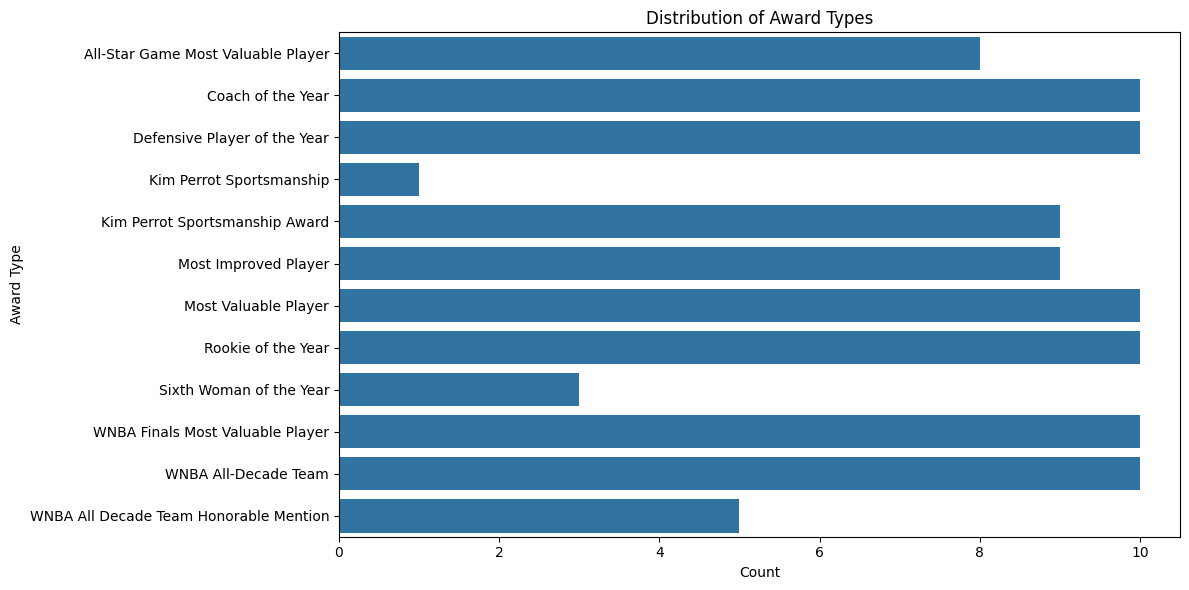

In [338]:
plt.figure(figsize=(12, 6))
sns.countplot(data=awards_players, y='award')
plt.title('Distribution of Award Types')
plt.xlabel('Count')
plt.ylabel('Award Type')
plt.tight_layout()
plt.show()

## 7. Conclusion
